# Análise Exploratória dos Dados dos Manuais de Procedimentos Operacionais (MPO) do SIN - Sistema Interligado Nacional

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

## 1. Importando os dados

In [3]:
PLANILHA_MPO = '../../Data/Raw/mpo_fragmentos.xlsx'

# Algumas colunas tem seus tipos configurados diretamente na leitura do arquico Excel. Isso evita problemas posteriores de conversões de tipo
df_mpo = pd.read_excel(PLANILHA_MPO, converters={'ID': int, 'Level':str, 'MpoIdentificador':str, 'MpoAreaEletrica':str, 'MpoCentro':str, 'MpoLigadoDesligado':str, 'Texto':str, 'Título':str})

## 2. Verificando os dados

### 2.1 Descrição dos dados

In [4]:
df_mpo.describe()

,ID
count,5456.000000
mean,164023.546188
std,1582.979113
min,161279.000000
25%,162654.750000
50%,164023.500000
75%,165394.500000
max,166764.000000


### 2.2 Formatos

In [5]:
print('Formato dos dados:', df_mpo.shape, '\n')
print('Colunas:', df_mpo.columns.tolist())
df_mpo.head(5)

Formato dos dados: (5456, 32) 

Colunas: ['ID', 'Level', 'MpoEquipamentos', 'StatusDocumento', 'MpoIdentificador', 'Tipo de Conteúdo', 'MpoEquipamentos:mrid', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'Hierarquia', 'Identificador exclusivo', 'MpoEquipamentos:agenteoperador', 'MpoEquipamentos:agenteproprietario', 'MpoEquipamentos:centro', 'MpoEquipamentos:chave', 'MpoEquipamentos:codagenteoperador', 'MpoEquipamentos:codagenteproprietario', 'MpoEquipamentos:codigoareaeletrica', 'MpoEquipamentos:codigoons', 'MpoEquipamentos:familia', 'MpoEquipamentos:nomegerlim', 'MpoEquipamentos:tipo', 'MpoLocalizacaoTaxonomia', 'MpoSubmodulo', 'MpoTema', 'MpoTipoDocumento', 'Nome do Documento', 'Texto', 'Título', 'Tipo de Item', 'Caminho']


,ID,Level,MpoEquipamentos,StatusDocumento,MpoIdentificador,Tipo de Conteúdo,MpoEquipamentos:mrid,MpoAreaEletrica,MpoCentro,MpoLigadoDesligado,...,MpoEquipamentos:tipo,MpoLocalizacaoTaxonomia,MpoSubmodulo,MpoTema,MpoTipoDocumento,Nome do Documento,Texto,Título,Tipo de Item,Caminho
0,161279,1,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:6...",OBJETIVO,Item,sites/buscafragmentada/Lists/ecmcontents
1,161280,2,NaN,Vigente,IO-PM.6MD,ecm-fragment,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:6pt; margin-left:34p...",CONSIDERAÇÕES GERAIS,Item,sites/buscafragmentada/Lists/ecmcontents
2,161281,3,NaN,Vigente,IO-PM.6MD,ecm-section,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:0...",PREPARAÇÃO PARA MANOBRAS EM LINHAS DE TRANSMISSÃO,Item,sites/buscafragmentada/Lists/ecmcontents
3,161282,3.1,NaN,Vigente,IO-PM.6MD,ecm-section,NaN,6MD,CNOS,Não definido,...,NaN,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><p style=""margin-top:0pt; margin-bottom:0...",LT 230 kV Coletora Porto Velho / Porto Velho C...,Item,sites/buscafragmentada/Lists/ecmcontents
4,161283,3.1.1,LT 230 kV Coletora Porto Velho / Porto Velho C...,Vigente,IO-PM.6MD,ecm-fragment,a9a06eca-6f49-4a3c-a804-feac9fb96942;#15054;#4...,6MD,CNOS,Desligar,...,LTR;#15054;#LTR;#15055,3.1.3.1.,10.21 - Preparação para Manobras da Interligaç...,Preparação para Manobras,Preparação de Manobra,Preparação para Manobras da Interligação em Co...,"<div><h4 style=""margin-top:12pt; margin-left:4...",Desenergização da LT 230 kV Coletora Porto Vel...,Item,sites/buscafragmentada/Lists/ecmcontents


### 2.3 Contagem de frequencias de palavras

In [6]:
pd.Series(' '.join(df_mpo.Texto).split()).value_counts()

style="font-family:Calibri;                        566805
color:#000000;                                     437217
font-size:10pt;                                    361948
text-decoration:underline;                         361610
solid                                              211087
                                                    ...  
IO-OI.NE.ABX</span><span                                1
style="font-family:Calibri">atraves</span><span         1
TR13                                                    1
violado.                                                1
style="height:174.5pt"><td                              1
Length: 38047, dtype: int64

### Ainda muito poluído pela quantidade de tags HTML do texto

### 2.4 Qualidade em relação a completude dos dados

In [7]:
df_mpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ID                                     5456 non-null   int64 
 1   Level                                  5456 non-null   object
 2   MpoEquipamentos                        1491 non-null   object
 3   StatusDocumento                        5456 non-null   object
 4   MpoIdentificador                       5456 non-null   object
 5   Tipo de Conteúdo                       5456 non-null   object
 6   MpoEquipamentos:mrid                   1491 non-null   object
 7   MpoAreaEletrica                        5456 non-null   object
 8   MpoCentro                              5456 non-null   object
 9   MpoLigadoDesligado                     5456 non-null   object
 10  Hierarquia                             5456 non-null   object
 11  Identificador exc

### Podemos ver que do total de fragmentos, 5456, somente 1491 apresentam informações diretamente relacionadas a equipamentos (Características MPOEquipamentos: *). Como o interesse do estudo é a classificação dos textos que efetivamente indicam manobras em equipamentos, pode ser um indicativo de diminuição de registros.

### 2.5 Valores distintos - Geral

In [8]:
colunas_interesse = ['MpoIdentificador','StatusDocumento', 'MpoTema', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'MpoTema', 'MpoTipoDocumento']

for ci in colunas_interesse:
    print(f'Coluna: {ci} | Distintos: {df_mpo[ci].nunique()} | Valores: {df_mpo[ci].unique()}\n')
    

Coluna: MpoIdentificador | Distintos: 30 | Valores: ['IO-PM.6MD' 'IO-PM.8XG' 'IO-PM.CO.2MS' 'IO-PM.CO.5GB' 'IO-PM.CO.5MT'
 'IO-PM.N.2TR' 'IO-PM.N.5MM' 'IO-PM.N.5PA' 'IO-PM.N.5RR' 'IO-PM.N.ACRO'
 'IO-PM.NE.2NO' 'IO-PM.NE.2OE' 'IO-PM.NE.2SO' 'IO-PM.NE.5CT'
 'IO-PM.NE.5LE' 'IO-PM.NE.5MA' 'IO-PM.NE.5SL' 'IO-PM.NNE' 'IO-PM.NSE'
 'IO-PM.S.2PR' 'IO-PM.S.2SC' 'IO-PM.S.5SU' 'IO-PM.SE.3RG' 'IO-PM.SE.3SP'
 'IO-PM.SE.4SP' 'IO-PM.SE.5MG' 'IO-PM.SE.5RJ' 'IO-PM.SE.5SE' 'IO-PM.SENE'
 'IO-PM.SSE']

Coluna: StatusDocumento | Distintos: 1 | Valores: ['Vigente']

Coluna: MpoTema | Distintos: 14 | Valores: ['Preparação para Manobras' '3.1.3. Preparação para Manobras'
 'Instruções da Região Norte - Área 230 kV Tramo Oeste'
 'Instruções da Região Norte - Área 500/230 kV Pará'
 'Instruções da Região NE - Área Norte'
 'Instruções da Região NE - Área Oeste'
 'Instruções da Região NE - Área Sudoeste'
 'Instruções da Região NE - Geral' 'Interligação entre Regiões'
 'Instruções da Região Sul'
 'Instruções da Regiã

### Apesar de termos 5456 fragmentos estamos falando de 30 Instruções Operativas de documentos vigentes e todos relacionados ao tópico preparação de manobra. Essas IOs tratam somente de ligar e desligar os equipamentos e a cobertura dos mesmo paerce ser do Brasil inteiro dada a presença de todos os centros de operação do ONS. Fato corroborado por todas as regiões geográficas estarem presentes.

### 2.6 Avaliação de Quantidades

<AxesSubplot:title={'center':'Centros por Fragmentos'}>

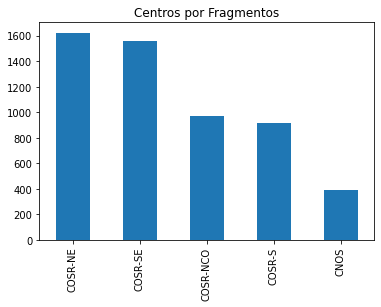

In [9]:
df_mpo['MpoCentro'].value_counts()[:5].plot(kind='bar', title='Centros por Fragmentos')

### A maior quatidade de fragmentos encontram-se nos centros Nordeste e Sudeste. Faz sentido já que estas regiões são as que concentram a maior quantidade de equipamentos

<AxesSubplot:title={'center':'Distribuição de fragmentos por IOs'}>

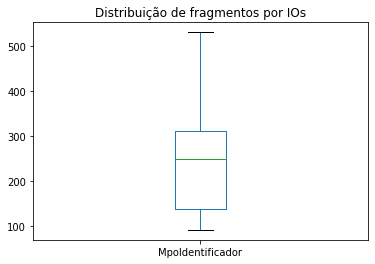

In [10]:
df_mpo['MpoIdentificador'].value_counts()[:20].plot(kind='box', title='Distribuição de fragmentos por IOs')

### Mediana em torno de 250 fragmentos, mínimo de 98, máximo de 540 aproximadamente. Negativamente assimétrico já que a mediana está mais próximo do 3o quartil. 1o quartil em 150 fragmentos e 3o em 320 fragmentos. Sem outliers.

### 2.7 Valores distintos - Equipamentos

In [11]:
colunas_interesse_eqp = ['MpoEquipamentos:agenteoperador', 'MpoEquipamentos:agenteproprietario', 'MpoEquipamentos:centro', 'MpoEquipamentos:chave', 'MpoEquipamentos:codagenteoperador', 'MpoEquipamentos:codagenteproprietario', 'MpoEquipamentos:codigoareaeletrica', 'MpoEquipamentos:codigoons', 'MpoEquipamentos:familia', 'MpoEquipamentos:nomegerlim', 'MpoEquipamentos:tipo', 'MpoLocalizacaoTaxonomia']

for ci in colunas_interesse_eqp:
    print(f'Coluna: {ci} | Distintos: {df_mpo[ci].nunique()}\n')

Coluna: MpoEquipamentos:agenteoperador | Distintos: 751

Coluna: MpoEquipamentos:agenteproprietario | Distintos: 751

Coluna: MpoEquipamentos:centro | Distintos: 751

Coluna: MpoEquipamentos:chave | Distintos: 751

Coluna: MpoEquipamentos:codagenteoperador | Distintos: 751

Coluna: MpoEquipamentos:codagenteproprietario | Distintos: 751

Coluna: MpoEquipamentos:codigoareaeletrica | Distintos: 751

Coluna: MpoEquipamentos:codigoons | Distintos: 751

Coluna: MpoEquipamentos:familia | Distintos: 751

Coluna: MpoEquipamentos:nomegerlim | Distintos: 751

Coluna: MpoEquipamentos:tipo | Distintos: 751

Coluna: MpoLocalizacaoTaxonomia | Distintos: 6



### Tirando a taxonomia podemos observar que de as IOs abrangem no mínimo 751 equipamentos.

### 2.8 Verificando o formato dos textos

In [12]:
df_mpo['Texto'].iloc[1]

'<div><p style="margin-top:6pt; margin-left:34pt; margin-bottom:3pt; text-indent:-34pt; text-align:justify; font-size:11pt"><span style="font-family:Calibri">2.1.</span><span style="font:7pt \'Times New Roman\'">&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0;&#xa0; </span><span><span style="font-family:Calibri">Os procedimentos contidos nesta instrução de operação são aqueles necessários para realização de manobras de desenergização e energização somente de linhas de transmissão e equipamentos da Rede de Operação, considerando em operação as demais linhas de transmissão e equipamentos das subestações envolvidas na manobra.</span></span></p><p style="margin-top:0pt; margin-left:28.35pt; margin-bottom:6pt; text-align:justify; widows:0; orphans:0; font-size:11pt"><span style="font-family:Calibri">As manobras que consideram equipamento(s) ou linha(s) de transmissão desligado(s) ou restrições adicionais no sistema devem estar especificadas nos itens da respectiva manobra.</span

In [13]:
display(HTML('<html><body>'+df_mpo['Texto'].iloc[1]+'<body/><html/>'))

In [14]:
df_mpo['Texto'].iloc[28]

'<div><table style="width:484.05pt; margin-left:3.5pt; border:2.25pt solid #ffffff; border-collapse:collapse"><thead><tr style="height:62.55pt"><td style="width:15.55pt; height:62.55pt; writing-mode:tb-rl; border-right:2.25pt solid #ffffff; border-bottom:2.25pt solid #ffffff; padding:1.72pt; background-color:#4f8ad8"><div style="height:62.55pt; writing-mode:tb-rl;transform:rotate(180deg);margin:0 auto;"><p style="margin-top:0pt; margin-bottom:0pt; text-align:center; widows:0; orphans:0; font-size:11pt"><span style="font-family:Calibri; font-weight:bold; color:#ffffff">Passo</span></p></div></td><td style="width:14.25pt; height:62.55pt; writing-mode:tb-rl; border-right:2.25pt solid #ffffff; border-left:2.25pt solid #ffffff; border-bottom:2.25pt solid #ffffff; padding-right:2.38pt; padding-left:2.38pt; background-color:#4f8ad8"><div style="height:62.55pt; writing-mode:tb-rl;transform:rotate(180deg);margin:0 auto;"><p style="margin-top:0pt; margin-bottom:0pt; text-align:center; widows:0; 

In [15]:
display(HTML('<html><body>'+df_mpo['Texto'].iloc[28]+'<body/><html/>'))

### Podemos verificar que os textos estão codificados com a formatação HTML. As tags terão que ser retiradas para que os comandos de manobra possa ser mais facilmente tratados. Além disso palavras com acentuações, números diversos que não podem ser normalmente descartados, por exemplo: É de interesse saber os níveis de tensão dos equipamentos: 13.8 kV, 345 kV, 550 kV e não é tão importante assim saber a hierarquia do fragmento no documento, como 1.2.1.

## 3 Gerando parquet para uso na preparação dos dados

In [16]:
df_mpo_selecionados = df_mpo.filter(['ID', 'Level', 'MpoIdentificador', 'MpoAreaEletrica', 'MpoCentro', 'MpoLigadoDesligado', 'Texto', 'Título'], axis=1)

In [17]:
PARQUET_MPO_SELECIONADOS = '../../Data/Processed/mpo_selecionados.parquet'

df_mpo_selecionados.to_parquet(PARQUET_MPO_SELECIONADOS)